<a href="https://colab.research.google.com/github/Dipesh-empire/sales-analysis-model/blob/main/sales_analysis_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uoloaded = files.upload()

Saving train.csv to train.csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import models

# Data preprocessing and EDA

In [4]:
df =pd.read_csv("train.csv")

In [5]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [7]:
# changing dateandtime of the orderdate and shipdate
df['Order Date'] = pd.to_datetime(df['Order Date'], format = "%d/%m/%Y", errors= 'coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'],format = "%d/%m/%Y", errors = 'coerce')

In [8]:
#calculating the nullvalues
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [43]:
#Dropping the null values
df.dropna(inplace=True)

In [10]:
df1 = df.copy()

In [44]:
#Adding months and year columns
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year

In [45]:
df1['Month'] = df1['Order Date'].dt.month
df1['Year'] = df1['Order Date'].dt.year

In [13]:
df['shipping_delay']= df['Ship Date'] - df['Order Date']
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Month,Year,shipping_delay
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,11,2017,3 days
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,11,2017,3 days
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,6,2017,4 days
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,10,2016,7 days
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,10,2016,7 days


In [14]:
#Shipping is delayed for lots of time, which can be improved for company to grow.

count= (df['shipping_delay']>pd.Timedelta(days=5)).sum()

print(f"Number of orders with shipping delay greater than 5 days: {count}")


Number of orders with shipping delay greater than 5 days: 1785


In [49]:
#Delayed shipping for specific sub categories
delayed_categories= df[(df['shipping_delay']>pd.Timedelta(days=5))] ['Sub-Category'].value_counts()
print(delayed_categories)

#Measuring  out the percentage delayed counts
total_counts = df['Sub-Category'].value_counts()

delayed_percentage = (delayed_categories/total_counts)*100

print(delayed_percentage)


#As,  it shows that every thing is delayed for more than 5 days which can be reduced
# by making shipping fast and increase the sale.



Sub-Category
Binders        287
Paper          236
Furnishings    168
Phones         159
Storage        157
Art            155
Accessories    127
Chairs         107
Appliances      80
Labels          72
Tables          51
Envelopes       49
Supplies        36
Fasteners       35
Bookcases       34
Machines        23
Copiers          9
Name: count, dtype: int64
Sub-Category
Accessories    16.843501
Appliances     17.467249
Art            19.770408
Binders        19.235925
Bookcases      15.111111
Chairs         17.656766
Copiers        13.636364
Envelopes      19.838057
Fasteners      16.355140
Furnishings    18.045113
Labels         20.168067
Machines       20.000000
Paper          17.664671
Phones         18.171429
Storage        18.892900
Supplies       19.565217
Tables         16.242038
Name: count, dtype: float64


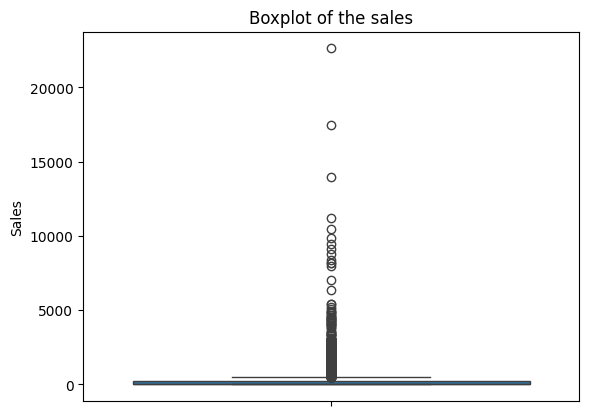

In [15]:
#Box plot for the sales

sns.boxplot(df1['Sales'])
plt.title("Boxplot of the sales")
plt.show()

In [16]:

# Capping outliers in 'Sales' using the IQR method to reduce distortion
Q1 = df1['Sales'].quantile(0.25)
Q3 = df1['Sales'].quantile(0.75)

IQR = Q3-Q1

lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

df1['Sales']= df1['Sales'].clip(lower_bound,upper_bound)

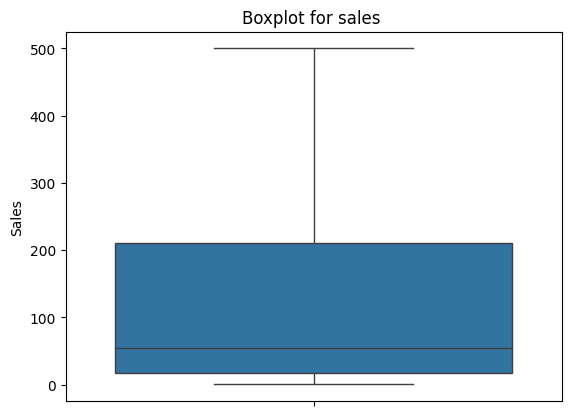

In [17]:
#modified box plot
sns.boxplot(df1['Sales'])
plt.title("Boxplot for sales ")
plt.show()

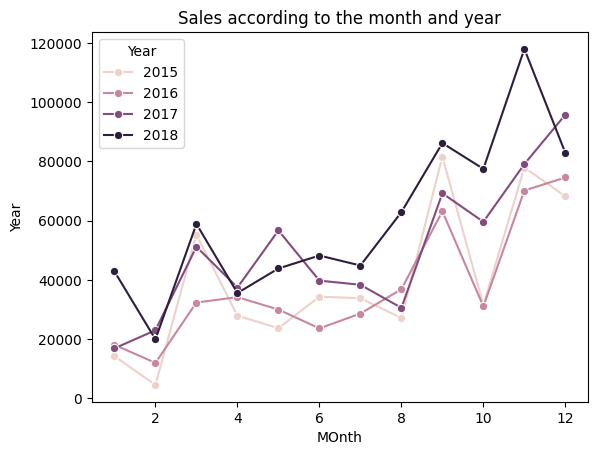

In [18]:
#Line plot for the sales in year and month
monthly_sales = df.groupby(['Year','Month']) ['Sales'].sum().reset_index()

sns.lineplot(data = monthly_sales,x='Month', y='Sales',hue='Year', marker='o')
plt.title("Sales according to the month and year")
plt.xlabel("MOnth")
plt.ylabel('Year')
plt.show()


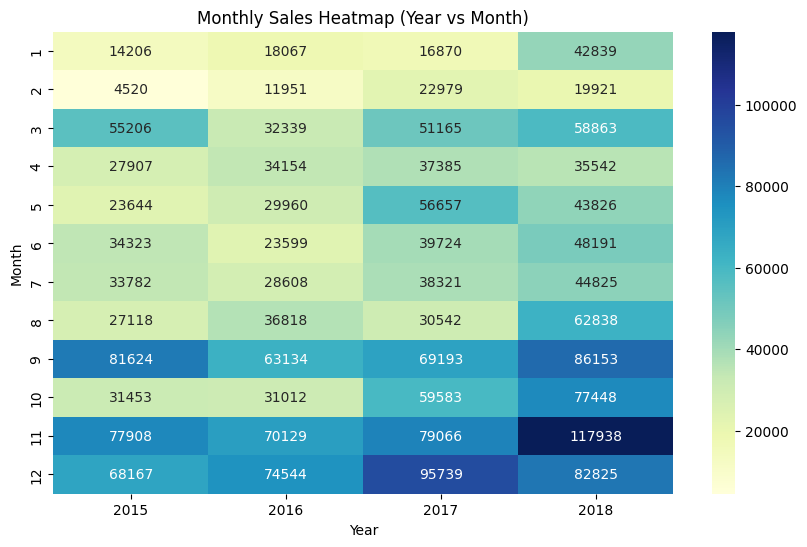

In [19]:
#Heat map for the sales of the item in year and month
#Maximum sale is Happening in the last quarter, and is decreasing as quarter jncreases.

pivot = df.pivot_table(index='Month', columns='Year', values='Sales', aggfunc='sum')


plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Monthly Sales Heatmap (Year vs Month)")
plt.ylabel("Month")
plt.xlabel("Year")
plt.show()

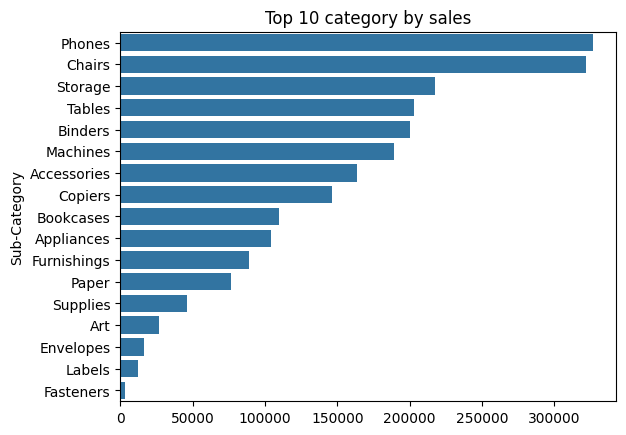

In [20]:
# The top  products on the cub-category is phones which is side by side with chairs.

top_products = df.groupby('Sub-Category') ['Sales'].sum().sort_values(ascending = False)

sns.barplot(x =top_products.values, y= top_products.index)
plt.title ("Top 10 category by sales")
plt.show()

# Deep Learning Model

In [21]:
# trainning_testing and splitting the data
df2= df.copy()

In [22]:
df2.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Month,Year,shipping_delay
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,11,2017,3 days
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,11,2017,3 days
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,6,2017,4 days
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,10,2016,7 days
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,10,2016,7 days


In [23]:
# one hot encoding the data
df2_encoded = pd.get_dummies(df2, columns=['Segment','Region','Category','Sub-Category','Ship Mode'],drop_first=True)

In [24]:
df2_encoded.head()

,Row ID,Order ID,Order Date,Ship Date,Customer ID,Customer Name,Country,City,State,Postal Code,...,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class
0,1,CA-2017-152156,2017-11-08,2017-11-11,CG-12520,Claire Gute,United States,Henderson,Kentucky,42420.0,...,False,False,False,False,False,False,False,False,True,False
1,2,CA-2017-152156,2017-11-08,2017-11-11,CG-12520,Claire Gute,United States,Henderson,Kentucky,42420.0,...,False,False,False,False,False,False,False,False,True,False
2,3,CA-2017-138688,2017-06-12,2017-06-16,DV-13045,Darrin Van Huff,United States,Los Angeles,California,90036.0,...,True,False,False,False,False,False,False,False,True,False
3,4,US-2016-108966,2016-10-11,2016-10-18,SO-20335,Sean O'Donnell,United States,Fort Lauderdale,Florida,33311.0,...,False,False,False,False,False,False,True,False,False,True
4,5,US-2016-108966,2016-10-11,2016-10-18,SO-20335,Sean O'Donnell,United States,Fort Lauderdale,Florida,33311.0,...,False,False,False,False,True,False,False,False,False,True


In [25]:
#scaling the sales data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df2_encoded['Sales'] = scaler.fit_transform(df2_encoded[['Sales']])

In [26]:
df2_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9789 entries, 0 to 9799
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   Row ID                    9789 non-null   int64          
 1   Order ID                  9789 non-null   object         
 2   Order Date                9789 non-null   datetime64[ns] 
 3   Ship Date                 9789 non-null   datetime64[ns] 
 4   Customer ID               9789 non-null   object         
 5   Customer Name             9789 non-null   object         
 6   Country                   9789 non-null   object         
 7   City                      9789 non-null   object         
 8   State                     9789 non-null   object         
 9   Postal Code               9789 non-null   float64        
 10  Product ID                9789 non-null   object         
 11  Product Name              9789 non-null   object         
 12  Sales      

In [47]:
# Making the model

X = df2_encoded.drop([
    'Sales',         # target
    'Row ID',
    'Order ID',
    'Order Date',
    'Ship Date',
    'Customer ID',
    'Customer Name',
    'Country',
    'City',
    'State',
    'Postal Code',
    'Product ID',
    'Product Name',
    'shipping_delay'
], axis=1)
y = df2_encoded['Sales']

X = X.astype('float32')
y = y.astype('float32')

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model =Sequential([
    Dense(64, activation ='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation ='relu'),
    Dense(1)

])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.fit(X_train,y_train,epochs=100, batch_size =32, validation_split =0.2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 870.3881 - mae: 16.2786 - val_loss: 0.0575 - val_mae: 0.1984
Epoch 2/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0576 - mae: 0.1954 - val_loss: 0.0511 - val_mae: 0.1853
Epoch 3/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0522 - mae: 0.1861 - val_loss: 0.0450 - val_mae: 0.1726
Epoch 4/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0451 - mae: 0.1729 - val_loss: 0.0387 - val_mae: 0.1626
Epoch 5/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0378 - mae: 0.1576 - val_loss: 0.0343 - val_mae: 0.1532
Epoch 6/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0327 - mae: 0.1468 - val_loss: 0.0243 - val_mae: 0.1275
Epoch 7/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0266 - mae: 0.1312 - val_loss: 0.0225 - val_mae: 0.1196
Epoch 8/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0197 - mae: 0.1139 - val_loss: 0.0147 - val_mae: 0.0975
Epoch 9/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3

In [50]:
# Mean absolute error of the dat a
loss, mae = model.evaluate(X_test, y_test)
print(f"Mean Absolute Error: {mae}")


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0536 - mae: 0.2297
Mean Absolute Error: 0.23046143352985382


In [51]:
#Predict on test data
y_pred_scaled = model.predict(X_test)

#Reshape for inverse scaling
y_pred_scaled = y_pred_scaled.reshape(-1,1)
y_test_scaled = y_test.values.reshape(-1,1)

#Inverse scaling to get original sales values
y_pred_original = scaler.inverse_transform(y_pred_scaled)
y_test_original = scaler.inverse_transform(y_test_scaled)

#Compare the prediction
comparison_df = pd.DataFrame({
    'Predicted Sales':y_pred_original[:20].flatten(),
    "Actual Sales": y_test_original[:20].flatten()
})

print(comparison_df)

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
    Predicted Sales  Actual Sales
0       5778.337402    273.959991
1       5331.265625     62.879997
2       5520.474609     11.680000
3       5841.291504      7.712000
4       7741.755859   2399.959961
5       4540.665039      8.640000
6       5508.988770    212.057999
7       5709.337891    122.328003
8       5085.320312     49.568001
9       5717.800781      8.712000
10      5410.282715     14.559999
11      5131.348633      6.080000
12      4981.173340    362.920013
13      5654.069336    931.176025
14      6139.310547    128.850006
15      5666.936523     91.176003
16      5767.456055     44.460003
17      5756.143555    868.590027
18      5736.194824    455.970001
19      4795.591797      6.480000


# Random Forest Model

In [52]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train,y_train)


RandomForestRegressor(random_state=42)

In [53]:
from sklearn.metrics import mean_absolute_error , r2_score

y_pred = rf_model.predict(X_test)

mae= mean_absolute_error(y_test, y_pred)
r2= r2_score(y_test,y_pred)

print(f"Mean absolute error:{mae:.2f}")
print(f"R2 score: {r2:.2f}")

Mean absolute error:0.01
R2 score: 0.07


In [54]:
comparison_df = pd.DataFrame({
    'Predicted Sales':y_pred[:20],
    'Actial Sales':y_test[:20]

})

print(comparison_df)

      Predicted Sales  Actial Sales
8962         0.022205      0.012082
7138         0.002971      0.002758
4709         0.001863      0.000496
6204         0.005910      0.000321
6901         0.050761      0.105995
4868         0.001520      0.000362
39           0.029978      0.009348
7106         0.017905      0.005384
7219         0.002278      0.002170
4703         0.003616      0.000365
6767         0.004972      0.000624
2923         0.000717      0.000249
1084         0.009886      0.016012
7530         0.004526      0.041114
4966         0.012400      0.005672
5721         0.006490      0.004008
3128         0.002450      0.001944
2520         0.009180      0.038349
9343         0.021711      0.020122
8329         0.003406      0.000267
